In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
dataset = pd.read_excel("../data/HousePricePrediction.xlsx")
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [17]:
dataset.shape

(2919, 13)

### Preprocessing

In [18]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Interger variables:", len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 4
Interger variables: 0
Float variables: 3


In [19]:
print(obj[obj].index)

Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')


<Axes: >

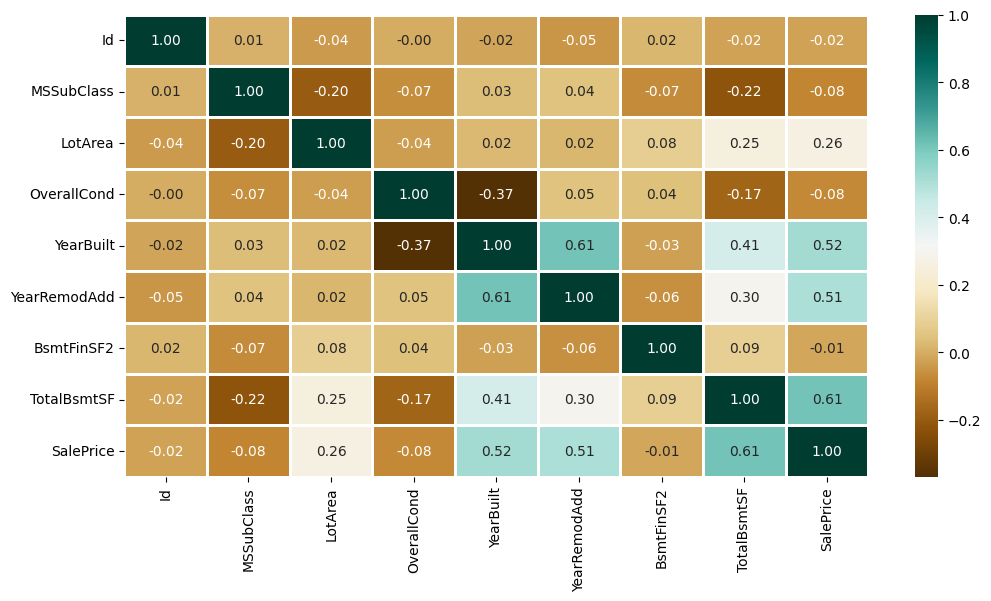

In [20]:
numeric_dataset = dataset.select_dtypes(include=[int, float])

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

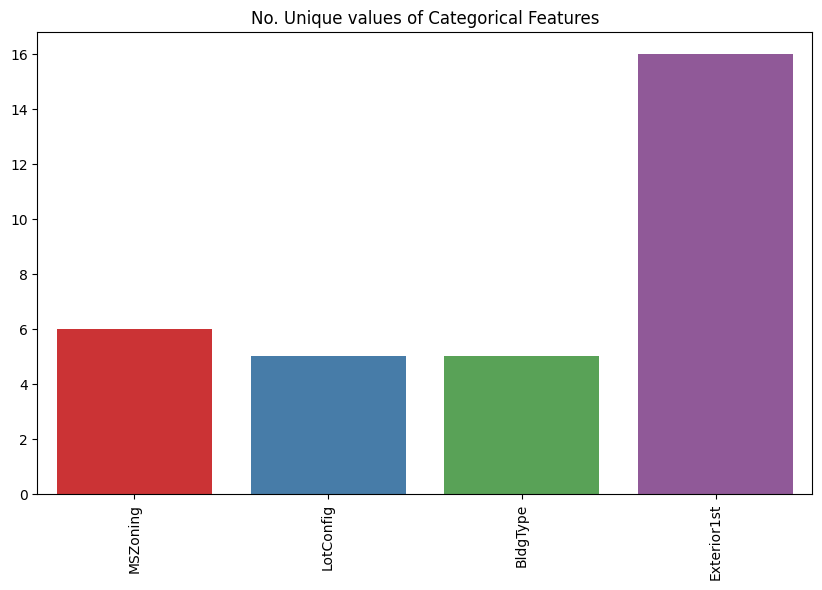

In [21]:
unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10, 6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols, y=unique_values, hue=object_cols, palette='Set1', legend=False)

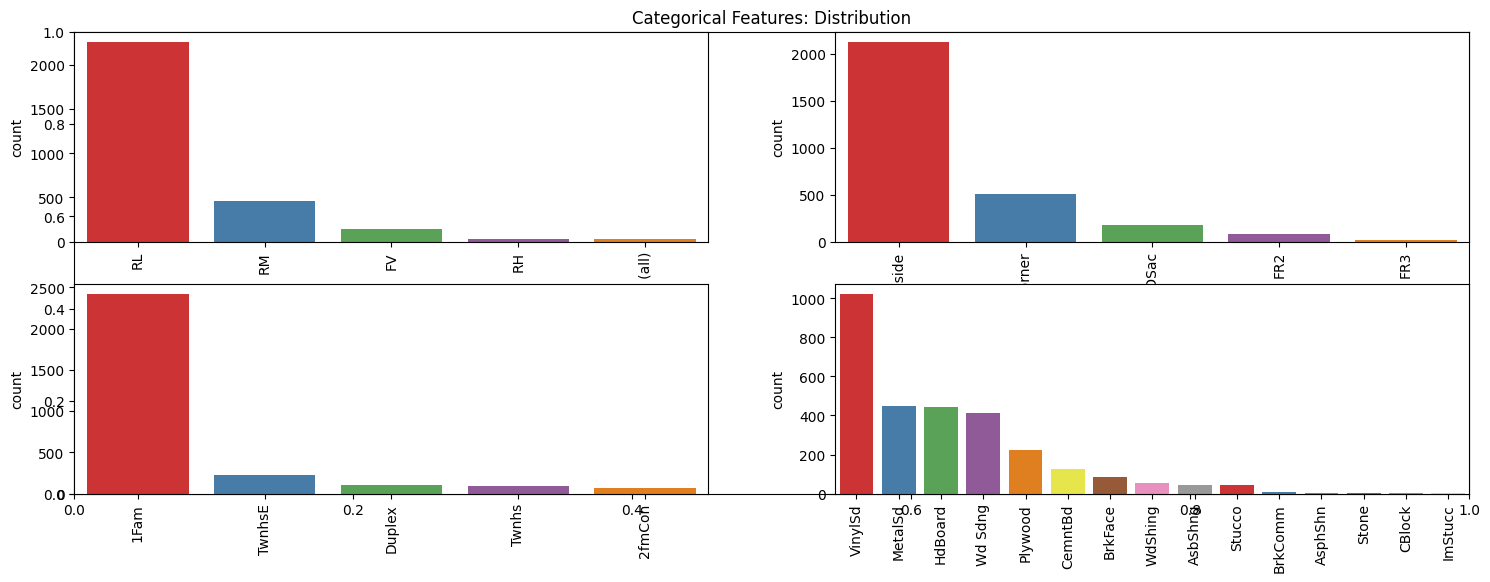

In [22]:
plt.figure(figsize=(18, 6))
plt.title('Categorical Features: Distribution')
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(2, 2, index)
    sns.barplot(x=list(y.index), y=y, hue=list(y.index), palette='Set1')
    plt.xticks(rotation=90)
    index +=1

In [23]:
dataset.drop(['Id'], axis=1, inplace=True)
print(dataset)

      MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  YearBuilt  \
0             60       RL     8450    Inside     1Fam            5       2003   
1             20       RL     9600       FR2     1Fam            8       1976   
2             60       RL    11250    Inside     1Fam            5       2001   
3             70       RL     9550    Corner     1Fam            5       1915   
4             60       RL    14260       FR2     1Fam            5       2000   
...          ...      ...      ...       ...      ...          ...        ...   
2914         160       RM     1936    Inside    Twnhs            7       1970   
2915         160       RM     1894    Inside   TwnhsE            5       1970   
2916          20       RL    20000    Inside     1Fam            7       1960   
2917          85       RL    10441    Inside     1Fam            5       1992   
2918          60       RL     9627    Inside     1Fam            5       1993   

      YearRemodAdd Exterior

In [24]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())
print(dataset)

      MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  YearBuilt  \
0             60       RL     8450    Inside     1Fam            5       2003   
1             20       RL     9600       FR2     1Fam            8       1976   
2             60       RL    11250    Inside     1Fam            5       2001   
3             70       RL     9550    Corner     1Fam            5       1915   
4             60       RL    14260       FR2     1Fam            5       2000   
...          ...      ...      ...       ...      ...          ...        ...   
2914         160       RM     1936    Inside    Twnhs            7       1970   
2915         160       RM     1894    Inside   TwnhsE            5       1970   
2916          20       RL    20000    Inside     1Fam            7       1960   
2917          85       RL    10441    Inside     1Fam            5       1992   
2918          60       RL     9627    Inside     1Fam            5       1993   

      YearRemodAdd Exterior

In [25]:
new_dataset = dataset.dropna()
print(new_dataset)

      MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  YearBuilt  \
0             60       RL     8450    Inside     1Fam            5       2003   
1             20       RL     9600       FR2     1Fam            8       1976   
2             60       RL    11250    Inside     1Fam            5       2001   
3             70       RL     9550    Corner     1Fam            5       1915   
4             60       RL    14260       FR2     1Fam            5       2000   
...          ...      ...      ...       ...      ...          ...        ...   
2914         160       RM     1936    Inside    Twnhs            7       1970   
2915         160       RM     1894    Inside   TwnhsE            5       1970   
2916          20       RL    20000    Inside     1Fam            7       1960   
2917          85       RL    10441    Inside     1Fam            5       1992   
2918          60       RL     9627    Inside     1Fam            5       1993   

      YearRemodAdd Exterior

In [26]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

### One Hot Encoder - label categorical features
One hot Encoding is the best way to convert categorical data into binary vectors. This maps the values to integer values. By using OneHotEncoder, we can easily convert object data into int.

In [28]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables: ", object_cols)
print('No. of. categorical features: ', len(object_cols))

Categorical variables:  ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [38]:
print(new_dataset)

      MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  YearBuilt  \
0             60       RL     8450    Inside     1Fam            5       2003   
1             20       RL     9600       FR2     1Fam            8       1976   
2             60       RL    11250    Inside     1Fam            5       2001   
3             70       RL     9550    Corner     1Fam            5       1915   
4             60       RL    14260       FR2     1Fam            5       2000   
...          ...      ...      ...       ...      ...          ...        ...   
2914         160       RM     1936    Inside    Twnhs            7       1970   
2915         160       RM     1894    Inside   TwnhsE            5       1970   
2916          20       RL    20000    Inside     1Fam            7       1960   
2917          85       RL    10441    Inside     1Fam            5       1992   
2918          60       RL     9627    Inside     1Fam            5       1993   

      YearRemodAdd Exterior

In [39]:
print(new_dataset[object_cols])

     MSZoning LotConfig BldgType Exterior1st
0          RL    Inside     1Fam     VinylSd
1          RL       FR2     1Fam     MetalSd
2          RL    Inside     1Fam     VinylSd
3          RL    Corner     1Fam     Wd Sdng
4          RL       FR2     1Fam     VinylSd
...       ...       ...      ...         ...
2914       RM    Inside    Twnhs     CemntBd
2915       RM    Inside   TwnhsE     CemntBd
2916       RL    Inside     1Fam     VinylSd
2917       RL    Inside     1Fam     HdBoard
2918       RL    Inside     1Fam     HdBoard

[2913 rows x 4 columns]


In [ ]:
onehotcols = OneHotEncoder().fit

In [31]:
OHEncoder = OneHotEncoder()
OHE_cols = pd.DataFrame(OHEncoder.fit_transform(new_dataset[object_cols]))
ex = new_dataset.index
umns = OHEncoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
pd.concat([df_final, OHE_cols], axis=1)

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,0
0,60.0,8450.0,5.0,2003.0,2003.0,0.0,856.0,208500.0,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 10)\t1.0\n..."
1,20.0,9600.0,8.0,1976.0,1976.0,0.0,1262.0,181500.0,"(0, 3)\t1.0\n (0, 7)\t1.0\n (0, 10)\t1.0\n..."
2,60.0,11250.0,5.0,2001.0,2002.0,0.0,920.0,223500.0,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 10)\t1.0\n..."
3,70.0,9550.0,5.0,1915.0,1970.0,0.0,756.0,140000.0,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 10)\t1.0\n..."
4,60.0,14260.0,5.0,2000.0,2000.0,0.0,1145.0,250000.0,"(0, 3)\t1.0\n (0, 7)\t1.0\n (0, 10)\t1.0\n..."
...,...,...,...,...,...,...,...,...,...
2120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 10)\t1.0\n..."
2151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 10)\t1.0\n..."
2216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 14)\t1.0\n..."
2250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 10)\t1.0\n..."


In [37]:
print(umns, len(umns))

['MSZoning_C (all)' 'MSZoning_FV' 'MSZoning_RH' 'MSZoning_RL'
 'MSZoning_RM' 'LotConfig_Corner' 'LotConfig_CulDSac' 'LotConfig_FR2'
 'LotConfig_FR3' 'LotConfig_Inside' 'BldgType_1Fam' 'BldgType_2fmCon'
 'BldgType_Duplex' 'BldgType_Twnhs' 'BldgType_TwnhsE'
 'Exterior1st_AsbShng' 'Exterior1st_AsphShn' 'Exterior1st_BrkComm'
 'Exterior1st_BrkFace' 'Exterior1st_CBlock' 'Exterior1st_CemntBd'
 'Exterior1st_HdBoard' 'Exterior1st_ImStucc' 'Exterior1st_MetalSd'
 'Exterior1st_Plywood' 'Exterior1st_Stone' 'Exterior1st_Stucco'
 'Exterior1st_VinylSd' 'Exterior1st_Wd Sdng' 'Exterior1st_WdShing'] 30


In [35]:
print(type(OHE_cols), len(OHE_cols), len(OHE_cols.columns))

<class 'pandas.core.frame.DataFrame'> 2913 1


In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

X_train, X_vaild, Y_train, Y_vaild = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [43]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)
Y_pred = model_SVR.predict(X_vaild)

print(mean_absolute_percentage_error(Y_vaild, Y_pred))

0.187051293855688
